**Table of Content:**

i) Data Prepration

ii) Univariate analysis

iii) Which is largest pool of segment

iv) Key defining characterstic of each segment summary.

v) Behavior analysis.

vi) Which customer segment is most profitable and valuable.

vii) Summary of which product is most feasible for which segment.


In [1]:
# importing all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling as pp

ModuleNotFoundError: ignored

In [ ]:
# read the data
data = pd.read_csv('Market seg.csv')
data = data.drop(columns=['Var_1'])
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


**Data Size**

In [ ]:
# data size
data.shape

(8068, 10)

**Data type and content**

In [ ]:
# getting the information about the data .
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


**Check missing values**

In [ ]:
# handling the missing value.
# percentage of null values for each columns
null_percent = round(data.isnull().sum() / len(data.index) * 100, 2)
null_percent[null_percent>0]

Ever_Married        1.74
Graduated           0.97
Profession          1.54
Work_Experience    10.28
Family_Size         4.15
dtype: float64

In [ ]:
# For categorical columns like Ever_Married, Profession,Grdauated which are categorical columns we need to impute their mode values to their columns.
# For numerical columns like Work_Experience, Family_Size.
mode_value1 = data['Ever_Married'].mode()[0]
mode_value2 = data['Profession'].mode()[0]
mode_value3 = data['Graduated'].mode()[0]
median_value1 = data['Work_Experience'].median()
median_value2 = data['Family_Size'].median()
print(mode_value1,mode_value2,mode_value3,median_value1,median_value2)
# Replacing missing values in 'ever married' column with Yes.
# Replacing missing values in 'Profession' column with Artist.
# Replacing missing values in 'Graduated' cplumn with Yes.

Yes Artist Yes 1.0 3.0


**Impute missing values**

In [ ]:
# now we will be doing imputations.
data['Ever_Married'].fillna(mode_value1,inplace=True)
data['Profession'].fillna(mode_value2,inplace=True)
data['Graduated'].fillna(mode_value3,inplace=True)
data['Work_Experience'].fillna(median_value1,inplace=True)
data['Family_Size'].fillna(median_value2,inplace=True)

In [ ]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

**Outlier detection using IQR method**

C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\3208070414.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\3208070414.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Work_Experience'])


<Axes: xlabel='Work_Experience', ylabel='Density'>

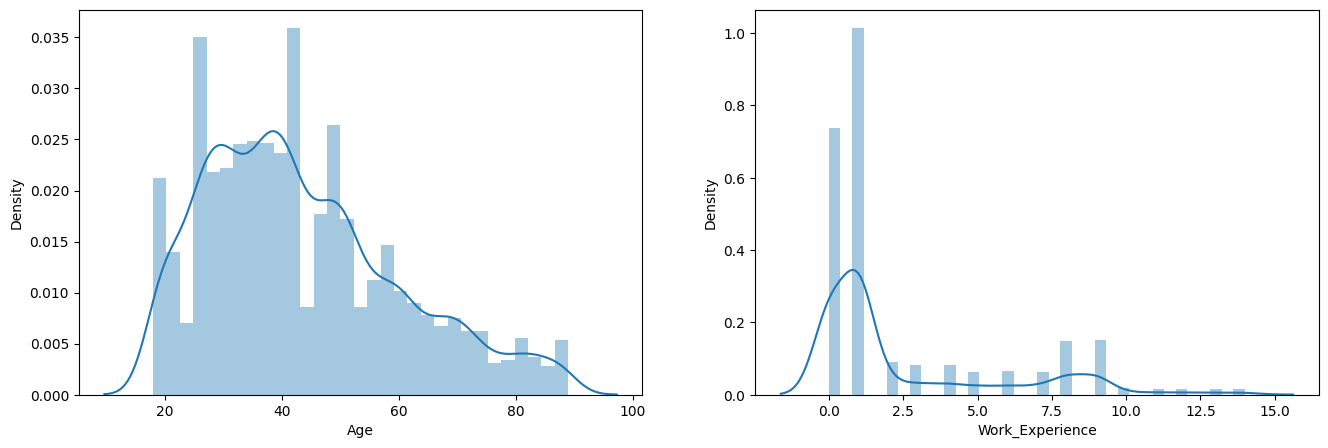

In [ ]:
# handling the outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Age'])
plt.subplot(1,2,2)
sns.distplot(data['Work_Experience'])

C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\3574301284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Family_Size'])


<Axes: xlabel='Family_Size', ylabel='Density'>

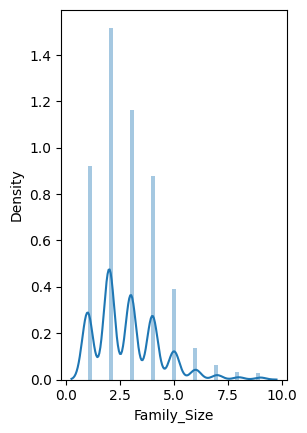

In [ ]:
plt.subplot(1,2,2)
sns.distplot(data['Family_Size'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a28a9b520>,
 'caps': [<matplotlib.lines.Line2D at 0x28a28a9ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a28a9b280>],
 'medians': [<matplotlib.lines.Line2D at 0x28a28a9bfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a28a50b80>],
 'means': []}

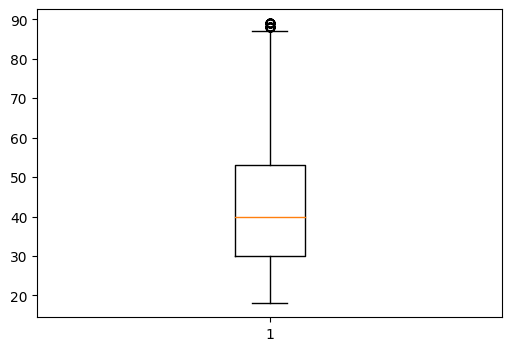

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(data['Age'])   # we can see some outliers in the column age.

In [ ]:
percentile25 = data['Age'].quantile(0.25)
percentile75 = data['Age'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [ ]:
data[data['Age']>upper_limit]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
321,467714,Male,Yes,89,Yes,Lawyer,13.0,Low,1.0,A
395,462149,Female,Yes,89,No,Lawyer,3.0,High,1.0,D
699,465264,Male,Yes,88,No,Executive,0.0,Low,1.0,A
753,464258,Female,Yes,88,No,Lawyer,0.0,High,2.0,B
943,459453,Male,Yes,88,Yes,Lawyer,1.0,Low,3.0,B
...,...,...,...,...,...,...,...,...,...,...
7262,459908,Male,Yes,89,No,Lawyer,0.0,Low,3.0,A
7778,463119,Female,Yes,88,Yes,Lawyer,1.0,High,2.0,C
7864,465221,Male,Yes,88,Yes,Artist,0.0,High,2.0,C
7866,464157,Male,Yes,88,Yes,Marketing,0.0,High,2.0,C


In [ ]:
data[data['Age']<lower_limit]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation


In [ ]:
new_data_cap = data.copy()
new_data_cap['Age'] = np.where(new_data_cap['Age']>upper_limit,upper_limit,
                              np.where(
                              new_data_cap['Age']<lower_limit,
                              lower_limit,
                              new_data_cap['Age']
                              )
                              )

{'whiskers': [<matplotlib.lines.Line2D at 0x28a28b0a5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a28b0ab00>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a28b0a320>],
 'medians': [<matplotlib.lines.Line2D at 0x28a28b0b040>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a28b0b2e0>],
 'means': []}

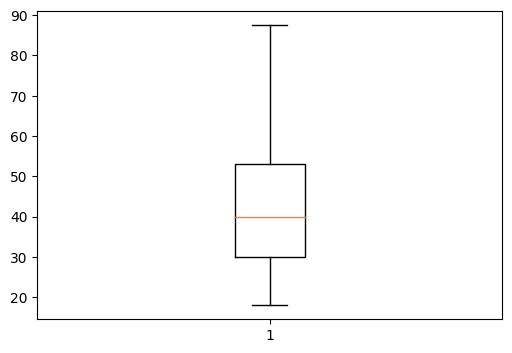

In [ ]:
# cross check wheather the outlier is removed.
plt.figure(figsize=(6,4))
plt.boxplot(new_data_cap['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a28b82590>,
 'caps': [<matplotlib.lines.Line2D at 0x28a28b82b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a28b822f0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a28aca800>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a28b830a0>],
 'means': []}

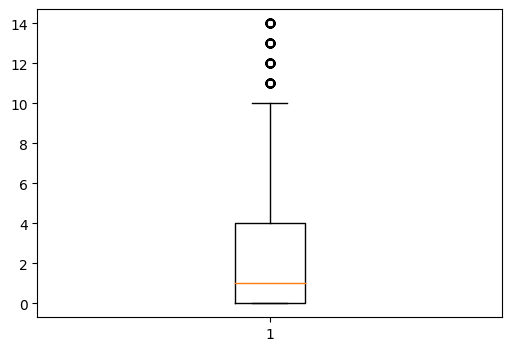

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(new_data_cap['Work_Experience'])

In [ ]:
percentile25 = new_data_cap['Work_Experience'].quantile(0.25)
percentile75 = new_data_cap['Work_Experience'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [ ]:
new_data_cap[new_data_cap['Work_Experience']>upper_limit]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
20,466084,Male,Yes,49.0,Yes,Homemaker,12.0,Low,1.0,A
22,465602,Male,Yes,33.0,Yes,Artist,13.0,Low,2.0,A
42,464590,Female,No,27.0,Yes,Artist,14.0,Low,3.0,A
55,462110,Male,Yes,32.0,Yes,Artist,14.0,Average,2.0,B
176,464866,Female,No,23.0,No,Engineer,11.0,Low,1.0,D
...,...,...,...,...,...,...,...,...,...,...
7835,463655,Male,Yes,39.0,Yes,Artist,13.0,Low,2.0,B
7870,462301,Female,No,27.0,No,Artist,12.0,Low,3.0,D
7990,465597,Female,No,43.0,Yes,Entertainment,14.0,Low,1.0,A
8028,465501,Male,Yes,40.0,Yes,Artist,13.0,High,1.0,D


In [ ]:
new_data_cap[new_data_cap['Work_Experience']<lower_limit]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation


In [ ]:
new_data_cap1 =new_data_cap.copy()
new_data_cap1['Work_Experience'] = np.where(new_data_cap1['Work_Experience']>upper_limit,upper_limit,
                              np.where(
                              new_data_cap1['Work_Experience']<lower_limit,
                              lower_limit,
                              new_data_cap1['Work_Experience']
                              )
                              )

{'whiskers': [<matplotlib.lines.Line2D at 0x28a28bfa4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a28bfa8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a28bfa200>],
 'medians': [<matplotlib.lines.Line2D at 0x28a28bfae00>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a28bfb0a0>],
 'means': []}

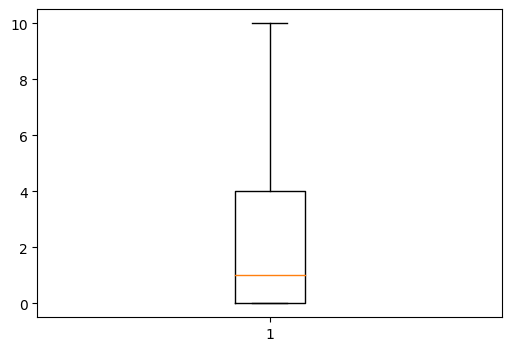

In [ ]:
# cross checking wheather the outlier is removed.
plt.figure(figsize=(6,4))
plt.boxplot(new_data_cap1['Work_Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a28c790f0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a28c79630>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a28c78e50>],
 'medians': [<matplotlib.lines.Line2D at 0x28a28bb3a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a28c79ab0>],
 'means': []}

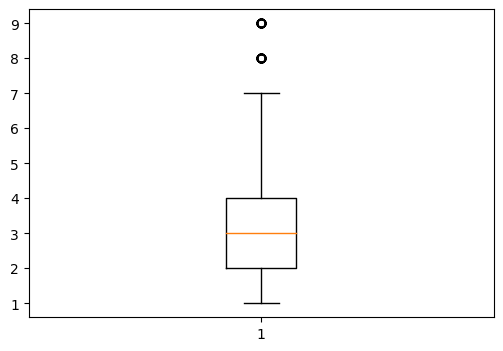

In [ ]:
# checking for outlier
plt.figure(figsize=(6,4))
plt.boxplot(new_data_cap1['Family_Size'])

In [ ]:
percentile25 = new_data_cap1['Family_Size'].quantile(0.25)
percentile75 = new_data_cap1['Family_Size'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [ ]:
new_data_cap1[new_data_cap1['Family_Size']>upper_limit]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
26,467604,Male,No,31.0,No,Healthcare,9.0,Low,8.0,A
150,464972,Male,Yes,67.0,No,Lawyer,0.0,High,9.0,A
202,464863,Female,Yes,25.0,No,Engineer,6.0,Average,8.0,D
292,459471,Female,No,32.0,No,Artist,1.0,Low,8.0,C
344,462391,Female,No,26.0,No,Healthcare,1.0,Low,8.0,C
...,...,...,...,...,...,...,...,...,...,...
7799,460608,Male,No,19.0,No,Healthcare,6.0,Low,8.0,D
7897,464675,Female,Yes,41.0,No,Doctor,0.0,Average,9.0,D
7900,462751,Male,No,31.0,No,Healthcare,3.0,Low,9.0,D
7993,463940,Female,No,26.0,No,Healthcare,1.0,Low,8.0,C


In [ ]:
new_data_cap1[new_data_cap1['Family_Size']<lower_limit]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation


In [ ]:
new_data_cap2 = new_data_cap1.copy()
new_data_cap2['Family_Size'] = np.where(new_data_cap2['Family_Size']>upper_limit,upper_limit,
                              np.where(
                              new_data_cap2['Family_Size']<lower_limit,
                              lower_limit,
                              new_data_cap2['Family_Size']
                              )
                              )

{'whiskers': [<matplotlib.lines.Line2D at 0x28a29107c10>,
 'caps': [<matplotlib.lines.Line2D at 0x28a2912d1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a2912ce50>],
 'medians': [<matplotlib.lines.Line2D at 0x28a2912d6f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a2912d9f0>],
 'means': []}

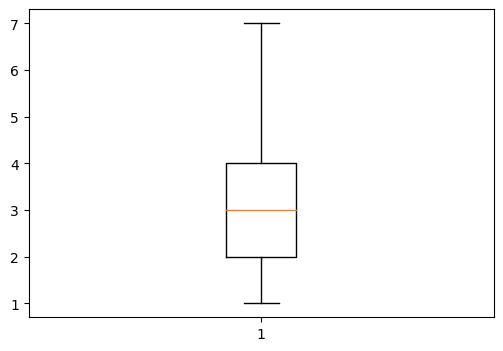

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(new_data_cap2['Family_Size'])

In [ ]:
final_data = new_data_cap2.copy()

**Relevant questions to be asked before analysis:**

Q1) How big is the dataset?

In [ ]:
# we will be performing exploratory data analysis
# there are total 7 questions which need to be asked.
# question1 -> How big is the dataset.
final_data.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22.0,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38.0,Yes,Engineer,1.0,Average,3.0,A
2,466315,Female,Yes,67.0,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40.0,Yes,Entertainment,1.0,High,6.0,A


Q2) How does the data look like?

In [ ]:
# question2-> How does the data look like?
final_data.sample(5)

Q3) What is the data type of the columns?

In [ ]:
# question3-> What is the data type of the columns
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   float64
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 630.4+ KB


Q4) Are there any missing values?

In [ ]:
# question 4-> Are there any missing values?
final_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

Q5) How does the data look mathematically?

In [ ]:
# questions5->How does the data look mathematically?
final_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.458044,2.415469,2.839241
std,2595.381232,16.687991,3.101948,1.441754
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,87.500000,10.000000,7.000000


Q6) Are there any duplicate values?

In [ ]:
# questions6->Are there duplicate values?
final_data.duplicated().sum()

0

Q7) How is the correlation between columns?

In [ ]:
# question7-> How is the correlation between cols?
final_data.corr()

C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\419925653.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data.corr()


,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005052,-0.017703,0.011396
Age,-0.005052,1.000000,-0.178975,-0.278262
Work_Experience,-0.017703,-0.178975,1.000000,-0.060568
Family_Size,0.011396,-0.278262,-0.060568,1.000000


**Univariate analysis**:

For categorical columns:

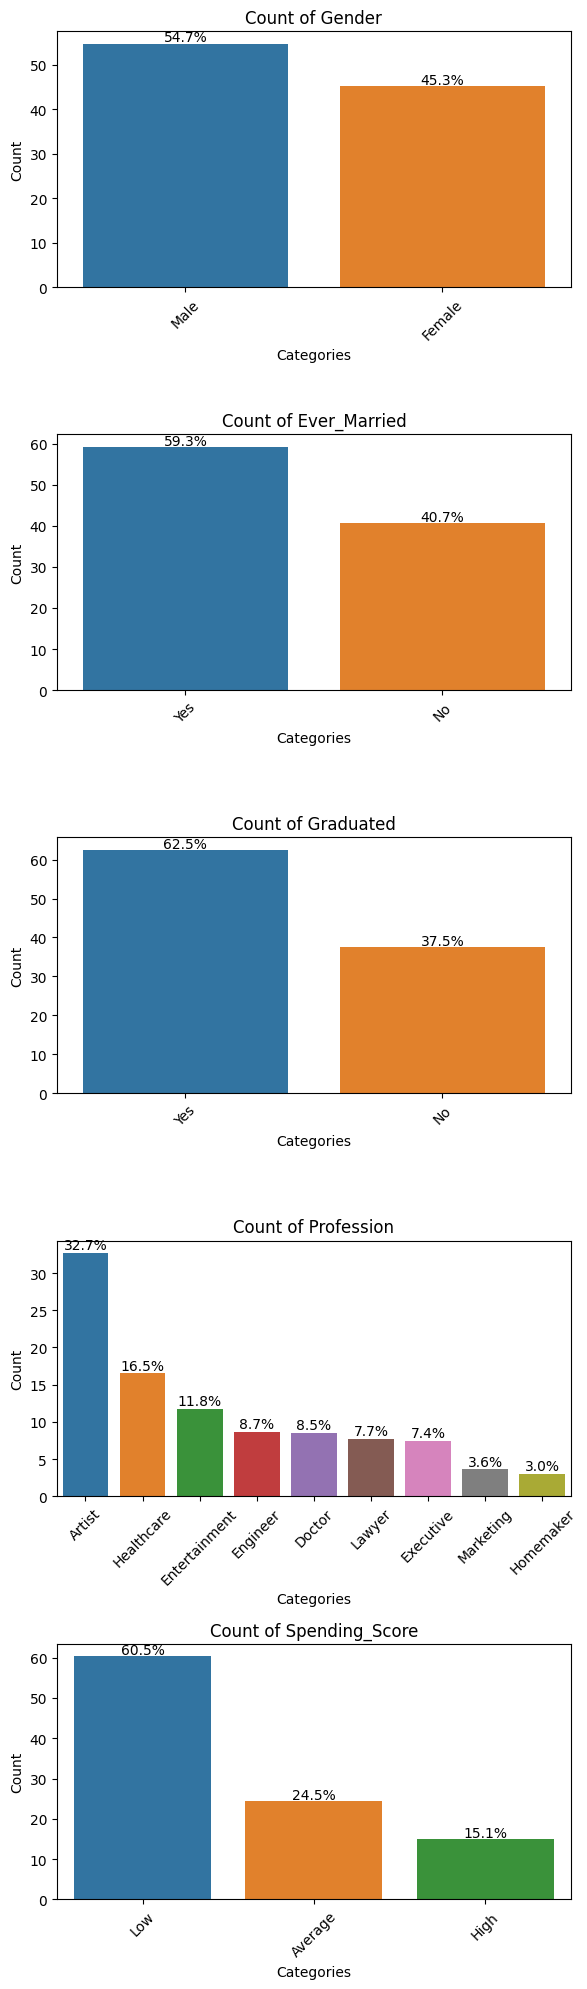

In [ ]:
# univariate analysis
# univariate analysis categorical data.
attribute_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
# Create a figure with subplots for each attribute
fig, axs = plt.subplots(len(attribute_list), figsize=(6, 4 * len(attribute_list)))
# Loop through each attribute
for i, attribute in enumerate(attribute_list):
    # Calculate value counts and percentages
    value_counts = final_data[attribute].value_counts(normalize=True) * 100
    # Plot a bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[i])
    # Set plot title and labels
    axs[i].set_title(f'Count of {attribute}')
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    # Add percentages on top of each bar
    for index, value in enumerate(value_counts):
        axs[i].text(index, value + 0.5, f'{value:.1f}%', ha='center', color='black', fontsize=10)
plt.tight_layout()
plt.show()

**Insights and key findings:**

i) Gender ratio is almost similar.

ii) Larger proportion of population has lower spending score.

iii) Artists and healthcare professionals dominates the cohort.

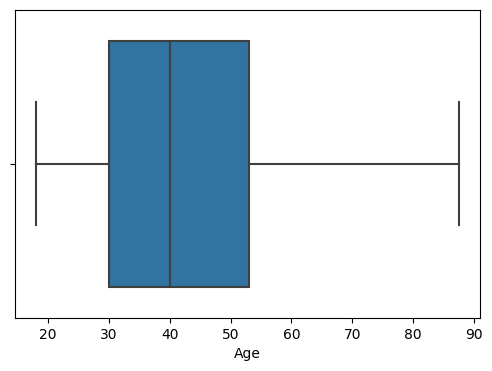

In [ ]:
# inivariate analysis of numerical data
# boxplot for age column
plt.figure(figsize=(6,4))
sns.boxplot(data=final_data,x='Age')
plt.show()

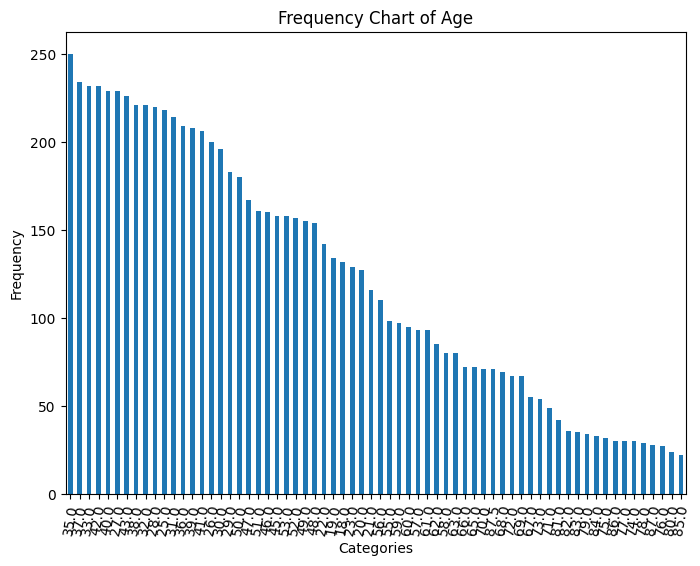

In [ ]:
# frequency plot for age column.
val_counts = final_data['Age'].value_counts()
plt.figure(figsize=(8,6))
val_counts.plot(kind='bar')
plt.title('Frequency Chart of Age')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.show()

**Insights and key findings:**

i) Median age of the population is 40 years.

ii) Mostly the cohort lies between the age group from 30-55 years.

iii) Min age is 20 years and Max age is 88 years.

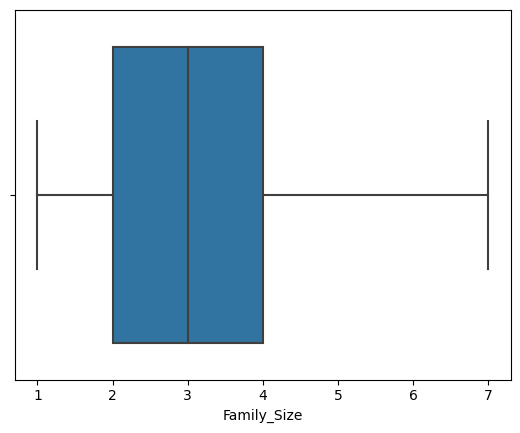

In [ ]:
# boxplot for family size column
sns.boxplot(data=final_data,x='Family_Size')
plt.show()

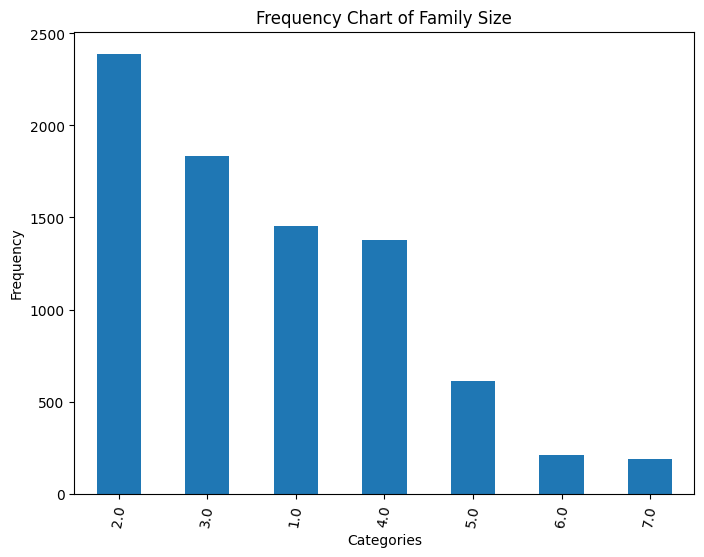

In [ ]:
# frequency plot for family size column
val_counts = final_data['Family_Size'].value_counts()
plt.figure(figsize=(8,6))
val_counts.plot(kind='bar')
plt.title('Frequency Chart of Family Size')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability if needed
plt.show()

**Insights and key findings**:

i) Median family size is 3.

ii) Mostly the cohort lies between the family size of 2-4.

iii) Min family size is 1 and max family size is 7.

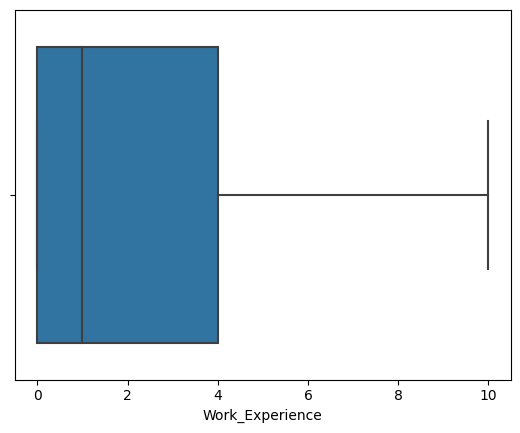

In [ ]:
# boxplot for work experience column
sns.boxplot(data=final_data,x='Work_Experience')
plt.show()

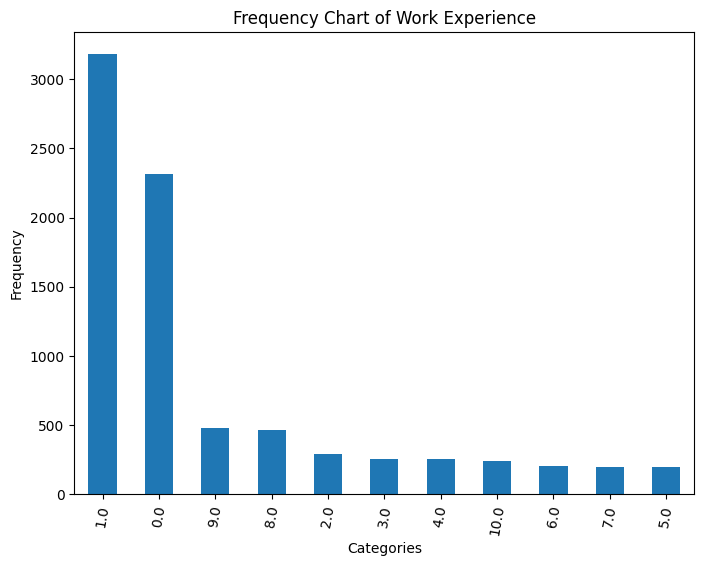

In [ ]:
# frequency plot for work experience column
val_counts = final_data['Work_Experience'].value_counts()
plt.figure(figsize=(8,6))
val_counts.plot(kind='bar')
plt.title('Frequency Chart of Work Experience')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability if needed
plt.show()

**Insights and key findings:**

i) Median Work Experience is 1 years.

ii) Mostly cohort lies between the Work Experience between 0-4 years.

iii) Min experience is 0 years and max experience is as up as 10 years.

**Which is the largest pool of Segments?**

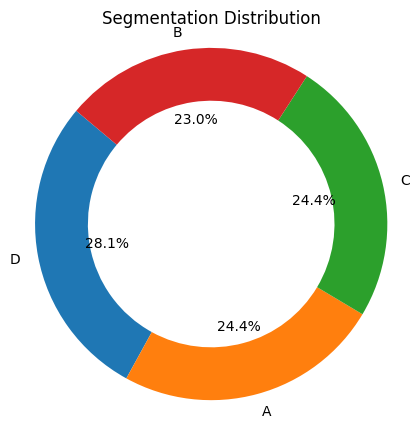

In [ ]:
# size of each segment.
segment_counts = final_data['Segmentation'].value_counts()
plt.figure(figsize=(5,5))
outer_circle = plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
inner_circle = plt.Circle((0, 0), 0.2, color='white')
plt.title('Segmentation Distribution')
plt.axis('equal')
plt.gca().add_artist(inner_circle)
plt.title('Segmentation Distribution')
plt.axis('equal')
plt.show()

**Insights and key findings:**

Segment D has largest set of customers.

**Bivariate analysis:**

**Analysis of Age wrt customer segments**

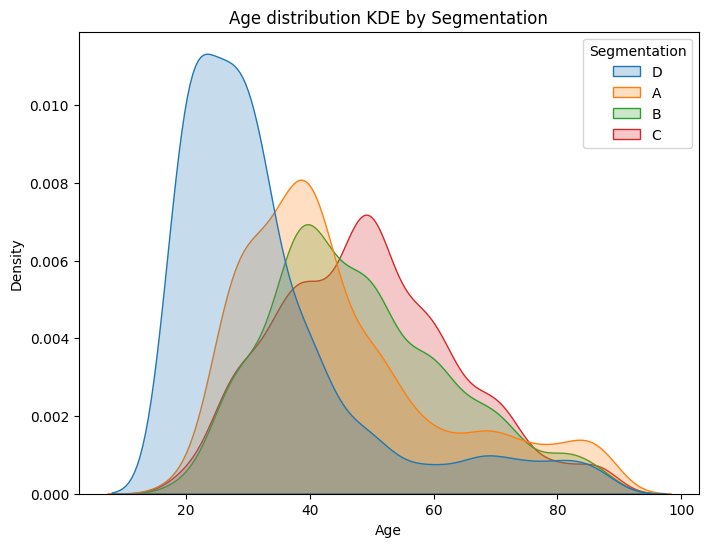

In [ ]:
# bivariate analysis.
# customer segments with age
plt.figure(figsize=(8,6))
sns.kdeplot(data = final_data,x='Age',hue='Segmentation',fill=True)
plt.title('Age distribution KDE by Segmentation')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

**Insights and key findings:**

i) Segment D has most probable age bracket of 20-30 years.

ii) Segment C has most probable age bracket of age 50 or more years.

iii) Segment B has most probable age bracket of age of 40 or more years.

iv) Segment A has most probable age bracket of age 30-50 years.

**Analysis of Family Size wrt customer Segments**

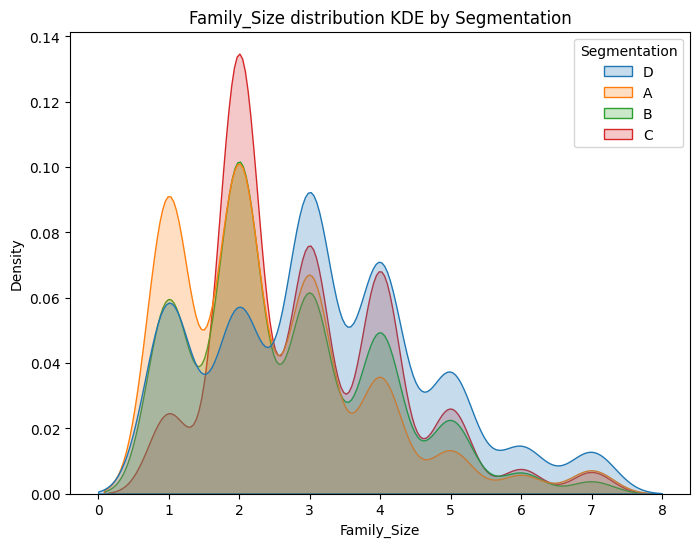

In [ ]:
# customer segments with family size
plt.figure(figsize=(8,6))
sns.kdeplot(data = final_data,x='Family_Size',hue='Segmentation',fill=True)
plt.title('Family_Size distribution KDE by Segmentation')
plt.xlabel('Family_Size')
plt.ylabel('Density')
plt.show()

**Insights and Key findings:**

i) Segment C has significant proportion within family size of 2.

ii) Segment D has significant proportion within family size of 2-3.

iii) Segment B has significant proportion within family size of 2-3.

iv) Segment A has significant proportion within family size of 1-2.

**Analysis of Profession wrt customer segments:**

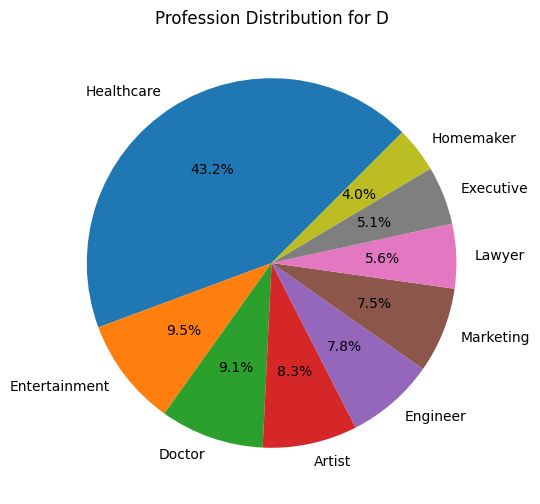

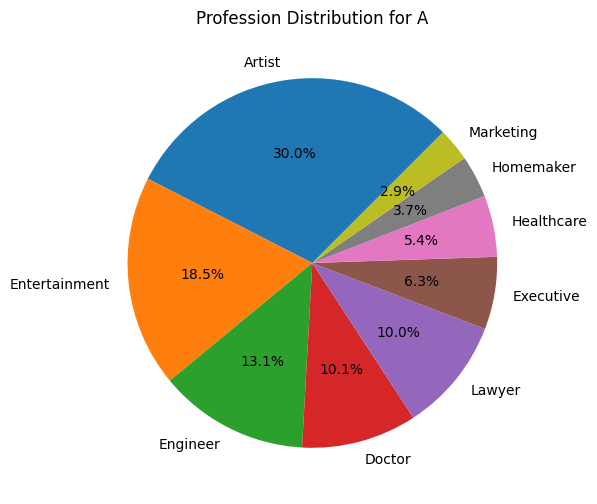

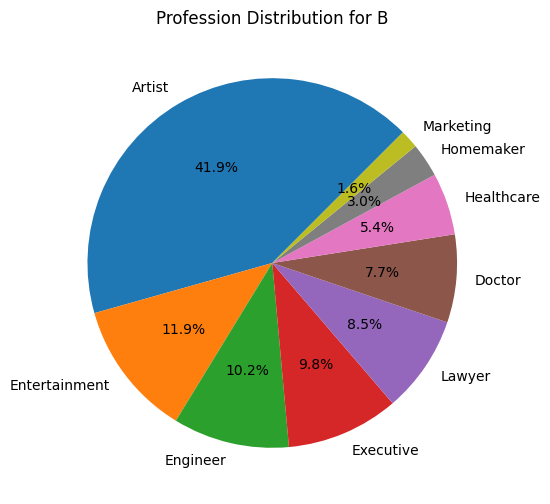

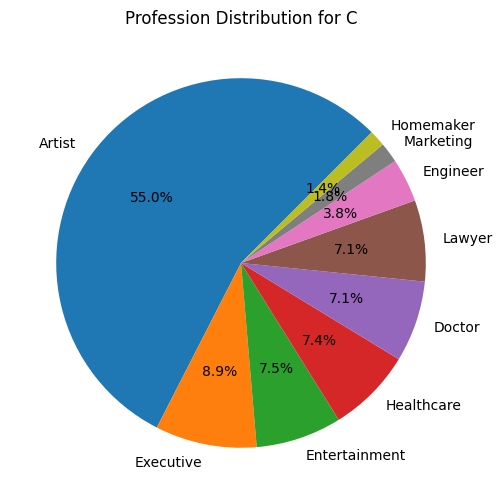

In [ ]:
variable1 = 'Segmentation'
variable2 = 'Profession'
# Get unique segments
segments = final_data[variable1].unique()
# Plotting pie charts for professions in each segment
for segment in segments:
    segment_data = final_data[final_data[variable1] == segment]
    profession_counts = segment_data[variable2].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=45)
    plt.title(f'Profession Distribution for {segment}')
    plt.show()

**Insights and key findings:**

i) Segment D has highest number of healthcare,doctors,homemakers and marketing professionals.

ii) Segment C has highest number of artists.

iii) Segment B has highest number of executive professionals.

iv) Segment A has highest number of entertainment,engineers and lawyers.



**Analysis of Ever Married wrt customer segments.**

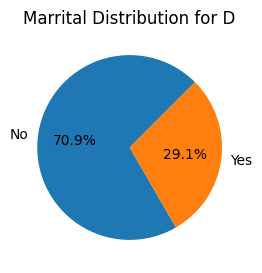

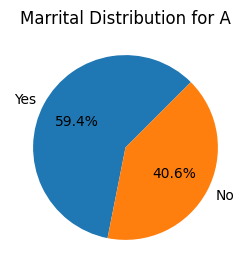

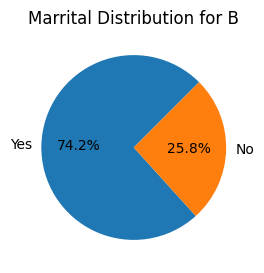

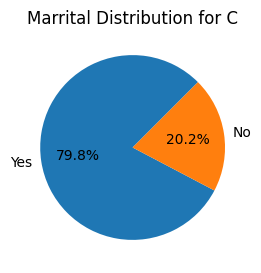

In [ ]:
variable1 = 'Segmentation'
variable2 = 'Ever_Married'
# Get unique segments
segments = final_data[variable1].unique()
# Plotting pie charts for professions in each segment
for segment in segments:
    segment_data = final_data[final_data[variable1] == segment]
    profession_counts = segment_data[variable2].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=45)
    plt.title(f'Marrital Distribution for {segment}')
    plt.show()

**Insights and key findings:**

i) Segment C has highest number of married people.

ii) Segment D has highest number of unmarried people.

**Analysis of Graduation wrt customer segments**

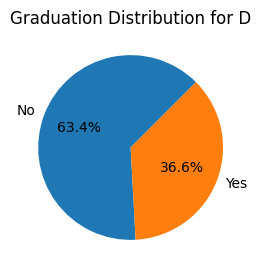

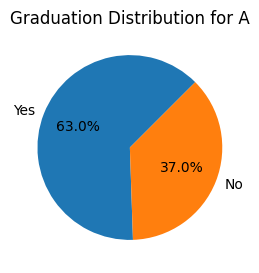

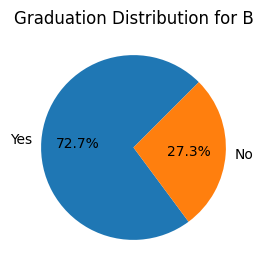

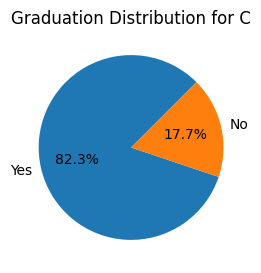

In [ ]:
variable1 = 'Segmentation'
variable2 = 'Graduated'
# Get unique segments
segments = final_data[variable1].unique()
# Plotting pie charts for professions in each segment
for segment in segments:
    segment_data = final_data[final_data[variable1] == segment]
    profession_counts = segment_data[variable2].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=45)
    plt.title(f'Graduation Distribution for {segment}')
    plt.show()


**Insights and key findings:**

i) Segment C has highest number of graduated people.

ii) Segment A has highest number of ungraduated people.

**Analysis of Spending score wrt customer segments**

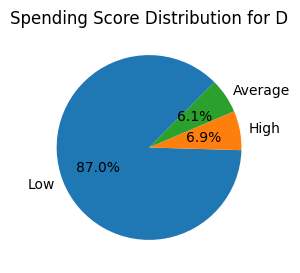

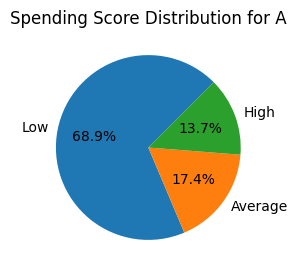

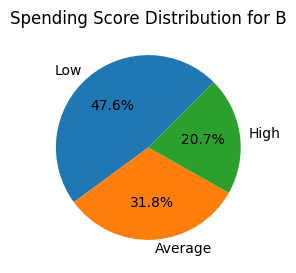

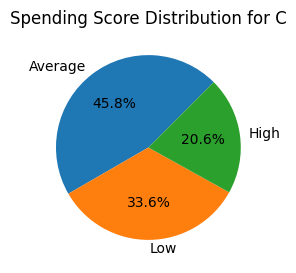

In [ ]:
variable1 = 'Segmentation'
variable2 = 'Spending_Score'
# Get unique segments
segments = final_data[variable1].unique()
# Plotting pie charts for professions in each segment
for segment in segments:
    segment_data = final_data[final_data[variable1] == segment]
    profession_counts = segment_data[variable2].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=45)
    plt.title(f'Spending Score Distribution for {segment}')
    plt.show()

**Insights and key findings:**

i) Segment B has highest number of people having spending score ranging from avg-high.

ii) Segment D has highest number of people having low spending score.

**Analysis of Gender wrt Customer segments:**

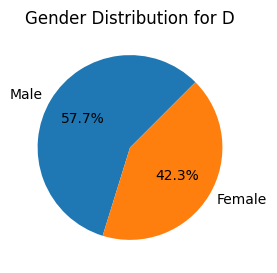

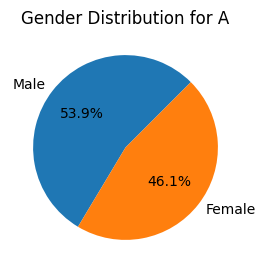

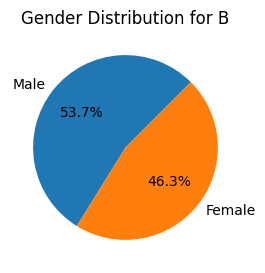

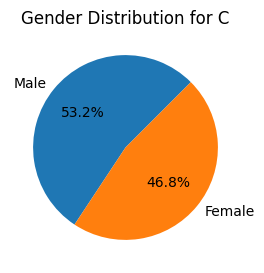

In [ ]:
variable1 = 'Segmentation'
variable2 = 'Gender'
# Get unique segments
segments = final_data[variable1].unique()
# Plotting pie charts for professions in each segment
for segment in segments:
    segment_data = final_data[final_data[variable1] == segment]
    profession_counts = segment_data[variable2].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=45)
    plt.title(f'Gender Distribution for {segment}')
    plt.show()

**Insights and key findings:**

i) Segment D has highest number of male population.

ii) Segment C has highest number of female population.

**Key Defining Characterstic of each segment are as follows:**

i) Segment A: Has **highest** number of **entertainment professionls,engineers and lawyers**.

ii) Segment B: Has **highest** number of **executive professionals**.Have **significant amount of people** having spending score ranging from **avg-high**.

iii) Segment C: Has **significant population**  having family size of 2.Has **highest** number of **artists**.Has **highest** number of **married people**.Has **highest** number of number of **graduated people**. Has **highest** number of **female** population.

iv) Segment D: Has **youngest population**. Has **highest** number of **healthcare,doctors ,homemakers and marketing** professionals.Has **highest** number of **unmarried people.**. Has **highest number** of people having **low spending score.**

**Behavioral Analysis:**

**Analysis of age wrt spending score:**

C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\4192096938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data[final_data['Spending_Score']=='High']['Age'],hist=False,color='red',label='High Spending Score')
C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\4192096938.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.gith

<Axes: xlabel='Age', ylabel='Density'>

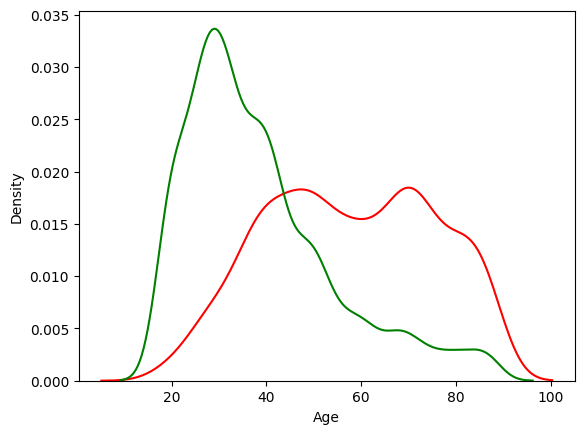

In [ ]:
# what are behavioural habbits of each segments.
sns.distplot(final_data[final_data['Spending_Score']=='High']['Age'],hist=False,color='red',label='High Spending Score')
sns.distplot(final_data[final_data['Spending_Score']=='Low']['Age'],hist=False,color='green',label='Low Spending Score')

**Insights and key findings:**

i) Segment A has mostly people from age group from 30-50. Therefore they tend to spend decently.

ii) Segment B has mostly people from age group from 40-60.Therefore they tend to spend more than segment A.

iii) Segment C has mostly people from age group from 45-60. Therefore they tend to spend more than segment B.

iv) Segment D has youngest population tending to least spending score.

**Analysis of spending score by gender:**

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

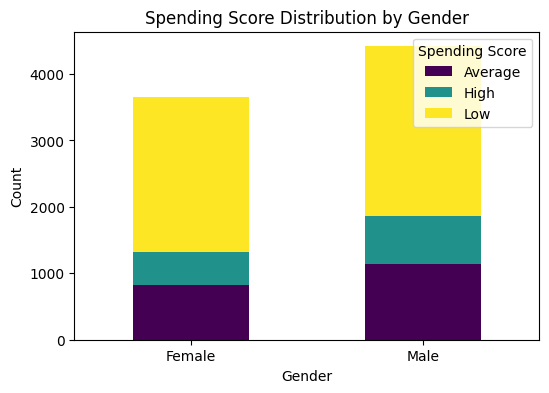

In [ ]:
cross_tab = pd.crosstab(final_data['Gender'], final_data['Spending_Score'])
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Spending Score')
plt.xticks(rotation=0)

**Insights and key findings:**

i) Spending score of both male and female is equal as the population of male is slightly more than female. Generally both tend to spend equally.

**Analysis of spending score by Profession:**

<Axes: xlabel='Profession', ylabel='count'>

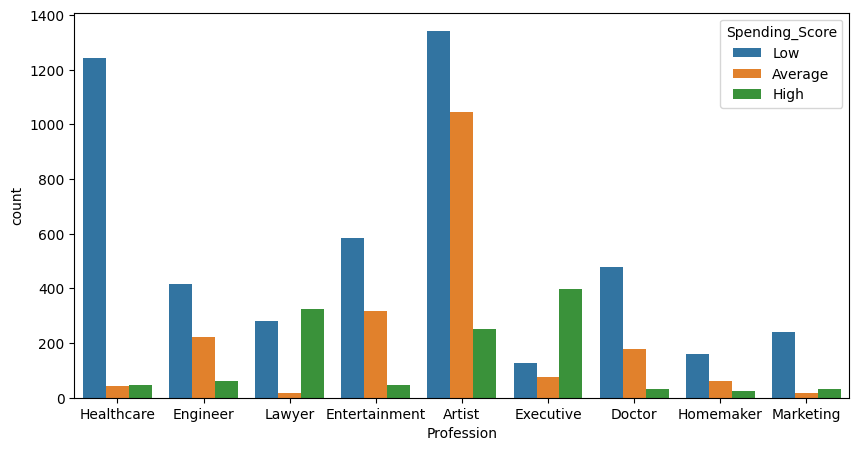

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=final_data['Profession'],hue=final_data['Spending_Score'],data = final_data)

**Insights and key findings:**

i) Spending score is high for Executives, Lawyers and artist professionals.

ii) Spending score is low for healthcare,Doctors , Homemakers,Marketing ,Engineers and artists professionals.

**Analysis of Profession wrt age and gender:**

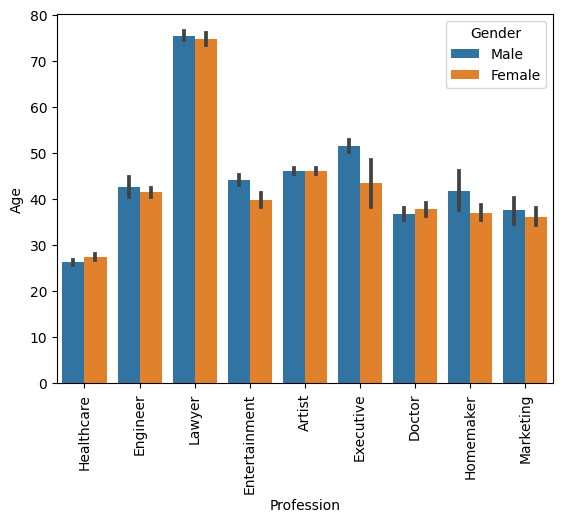

In [ ]:
sns.barplot(x='Profession', y='Age', data = final_data, estimator=np.mean,hue=final_data['Gender'])  # Change 'data' to your DataFrame name
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Insights and key findings:**

**Gender ratio** is maintained across all the professions and the **youngest slot** is of **Healthcare professionals** and **experienced slot** is of **Lawyers**.

**Multivariate Analysis:**

C:\Users\ABHIMANYU\AppData\Local\Temp\ipykernel_37156\1138083610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_data.corr()


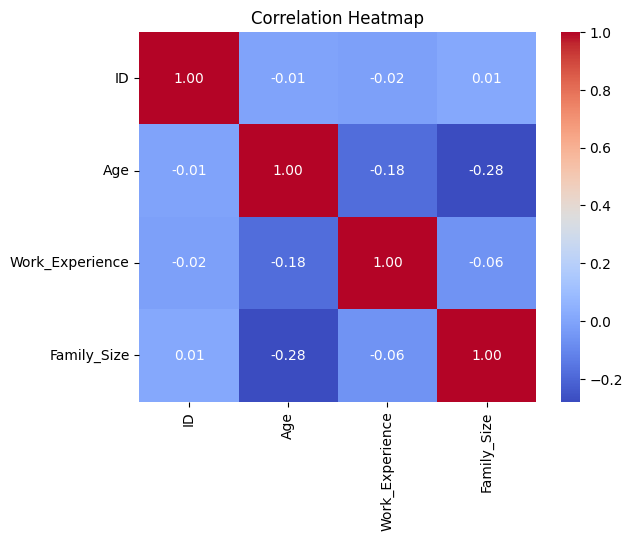

In [ ]:
# multivariate analysis
correlation_matrix = final_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# there is not strong relationship between any of the attributes.

  **Insights and key findings**:

 There is no significant strong correlation between any two attributes.

**Which segment is most profitable and valuable?**

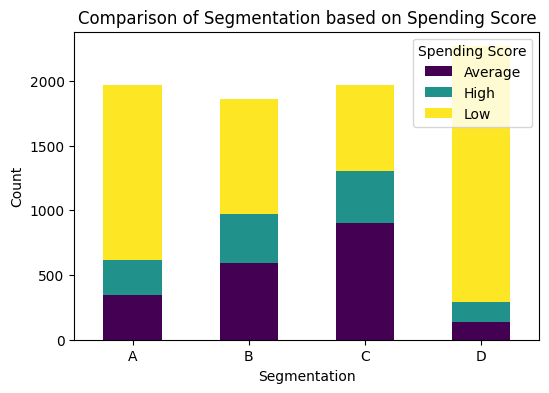

In [ ]:
# which segment is most profitable and valuable.
cross_tab = pd.crosstab(final_data['Segmentation'],final_data['Spending_Score'])
cross_tab.plot(kind='bar',stacked=True,figsize=(6,4),colormap='viridis')
plt.title('Comparison of Segmentation based on Spending Score')
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.legend(title='Spending Score')
plt.xticks(rotation=0)
plt.show()
# segmen C is the most valuable because it has significant amount of peope in average-high range category.

**Insights and key findings:**


**Segment C** has highest number of people having spending score in bracket of **average-high**.

**Which product is most feasable for which segment:**

**Segment A:**  30-50 year folks with decent spending capability.
*   Grooming product for men.
*   Hair and skin care products.

**Segment B:**  40 year or above folks with average-high spendings.

*   Family care products.
*   Feminine care products as good % female are present.

*   Personal Health Care products and medicines.
*   Hair care products.

**Segment C:** 50 year or above folks with mostly average-high spendings.

*   Personal Health care products.
*   Family care products.

**Segment D :** people with 20-40 year age.Highest number of unmarried people with max low spending score. Has one of the youngest population.

*   Skin and Personal Care products
*   Hair care products.
*   Feminine and cosmetics for young female population.














